In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:10<00:00, 113MB/s]
100% 1.06G/1.06G [00:10<00:00, 109MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

warnings.filterwarnings('ignore')
from keras.preprocessing.image import load_img


import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
#create dataframe from the input and output

input_path=[]
labels=[]

for classs in os.listdir("dogs_vs_cats/train"):
  for path in os.listdir("dogs_vs_cats/train/"+classs):
    if classs == "cats":
      labels.append(0)
    else:
      labels.append(1)
    input_path.append(os.path.join("dogs_vs_cats/train/"+classs,path))

In [ ]:
print(input_path[5000],labels[5000])

dogs_vs_cats/train/cats/cat.8.jpg 0


In [ ]:
len(input_path)

20000

In [ ]:
df=pd.DataFrame()

df["images"] = input_path
df["labels"] = labels

In [ ]:
df["labels"] = df["labels"].astype("str")

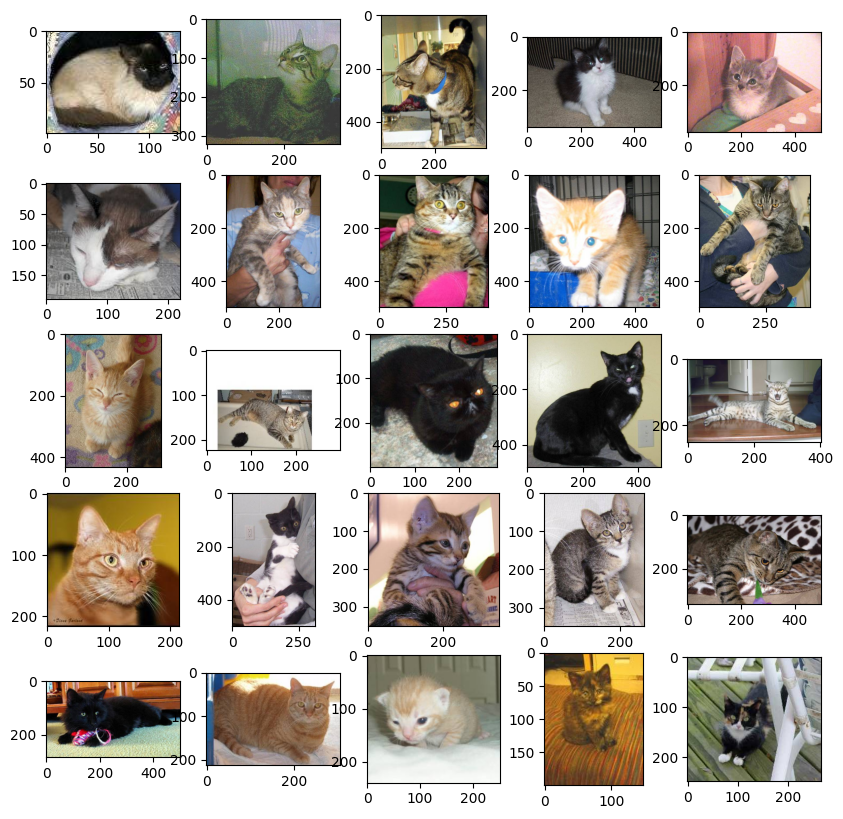

In [ ]:

cats = df[df["labels"]=="0"]["images"]

cats=cats.sample(25)
plt.figure(figsize=(10,10))
for i in range(len(cats)):
  plt.subplot(5,5,i+1)
  img=load_img(cats.iloc[i])
  plt.imshow(img)

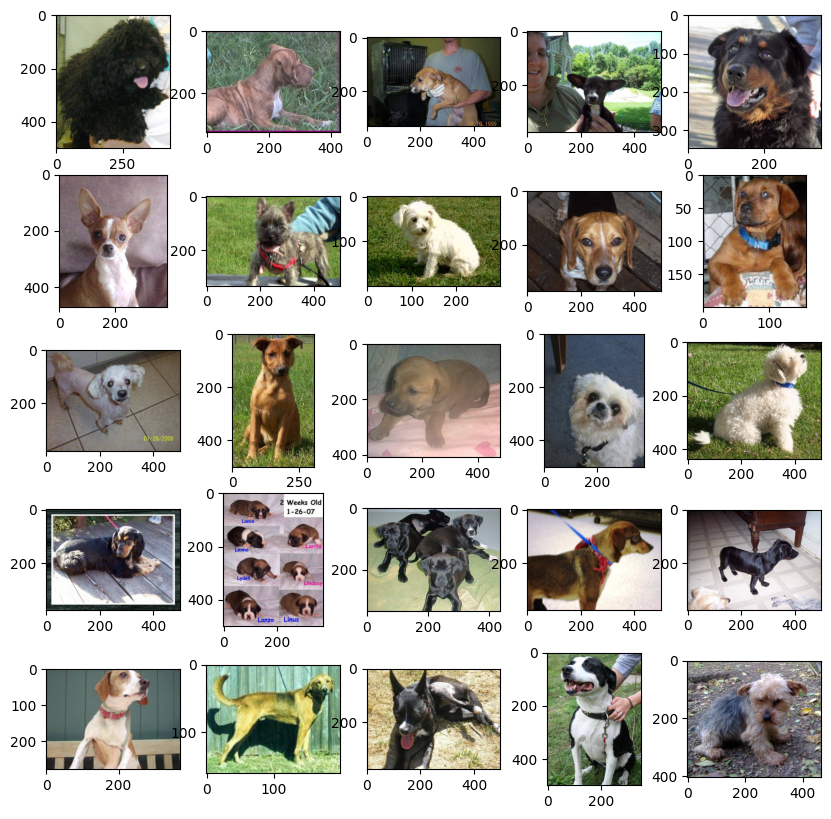

In [ ]:
dogs = df[df["labels"]=="1"]["images"]

dogs=dogs.sample(25)
plt.figure(figsize=(10,10))
for i in range(len(dogs)):
  plt.subplot(5,5,i+1)
  img=load_img(dogs.iloc[i])
  plt.imshow(img)

In [ ]:
from sklearn.model_selection import train_test_split
train_ds,test_ds=train_test_split(df,test_size=0.2,random_state=42)


train_ds.shape,test_ds.shape

((16000, 2), (4000, 2))

In [ ]:


train_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=0.2,
    shear_range=0.02,
    zoom_range=0.02,
    horizontal_flip=True,
    fill_mode="nearest",
)

test_gen = ImageDataGenerator(rescale=1/255)

train_iterator = train_gen.flow_from_dataframe(
    train_ds,
    x_col="images",
    y_col="labels",
    target_size=(256, 256),
    batch_size=32,
    shuffle=True,
    class_mode="binary",
)

test_iterator = test_gen.flow_from_dataframe(
    test_ds,
    x_col="images",
    y_col="labels",
    target_size=(256, 256),
    batch_size=32,
    class_mode="binary",
)


Found 16000 validated image filenames belonging to 2 classes.
Found 4000 validated image filenames belonging to 2 classes.


In [ ]:

# Define your model
model = Sequential()
# Add layers as you've done in your code
model.add(Conv2D(16,(3,3),activation="relu",input_shape=(256,256,3)))
model.add(MaxPool2D((2,2),strides=2,padding="valid",))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D((2,2),strides=2,padding="valid"))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D((2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:

model.fit(train_iterator, epochs=6, validation_data=test_iterator)

Epoch 1/6
  7/500 ━━━━━━━━━━━━━━━━━━━━ 46:37 6s/step - accuracy: 0.8956 - loss: 0.2501

KeyboardInterrupt: 